<a href="https://colab.research.google.com/github/guilhermeguy/Machine_Learning/blob/master/USAHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning
#### Linear Regression


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('paper')

In [0]:
USAHousing = pd.read_csv('USA_Housing.csv')

In [63]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [64]:
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [65]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

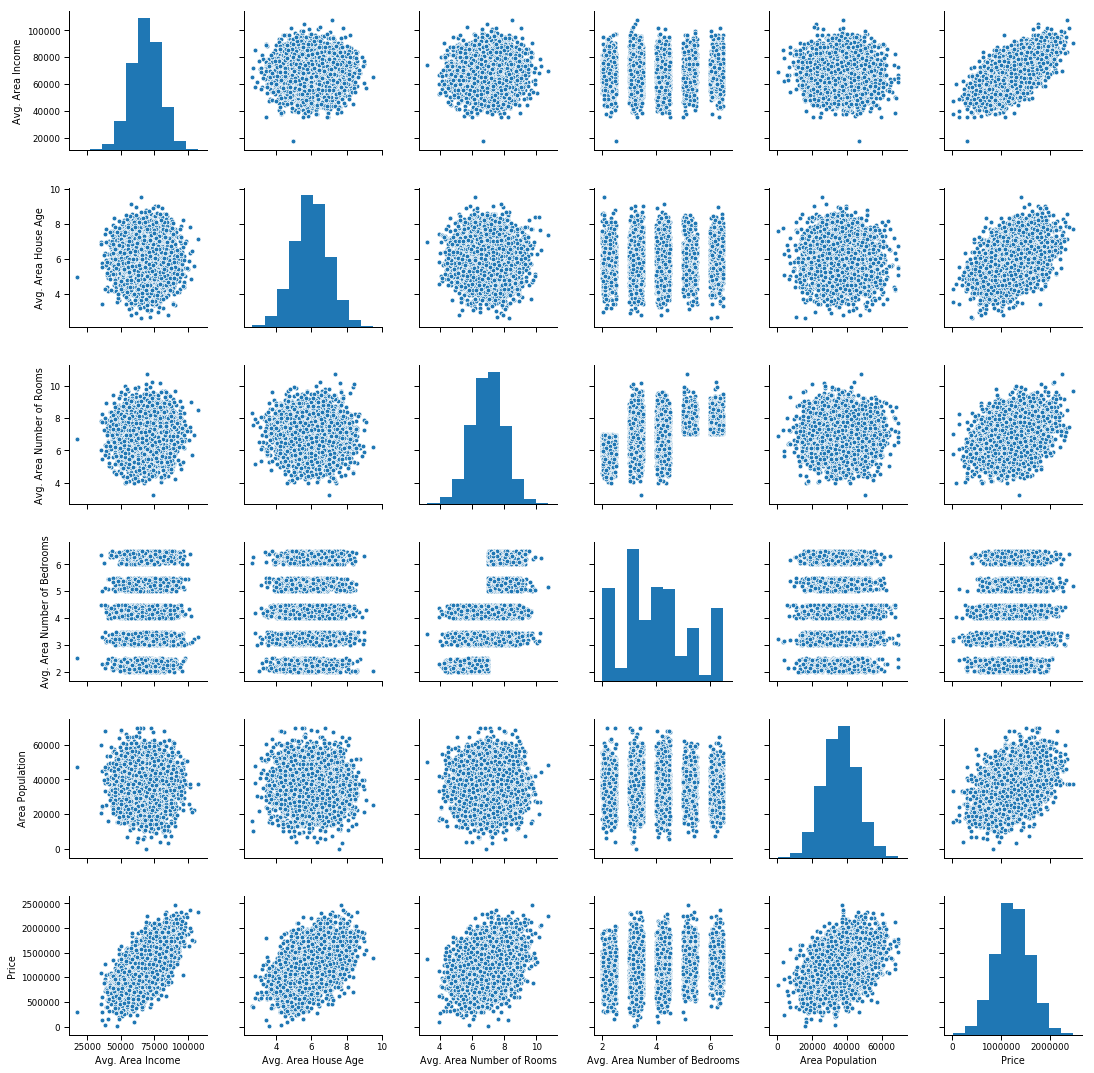

In [66]:
sns.pairplot(USAHousing)

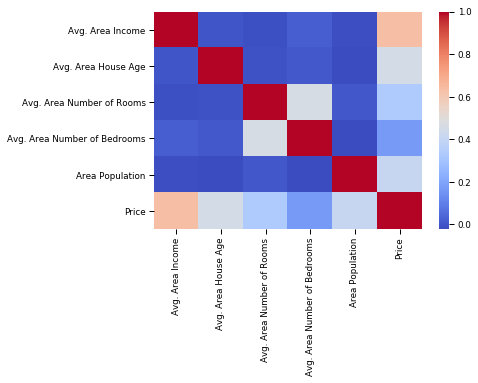

In [67]:
sns.heatmap(USAHousing.corr(), cmap='coolwarm')

In [68]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [0]:
x = USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [70]:
y = USAHousing['Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [75]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(lm.intercept_)

-2640159.796853739


In [77]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [78]:
pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])

,Coefs
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [0]:
predict = lm.predict(x_test)

Text(0, 0.5, 'Prediction')

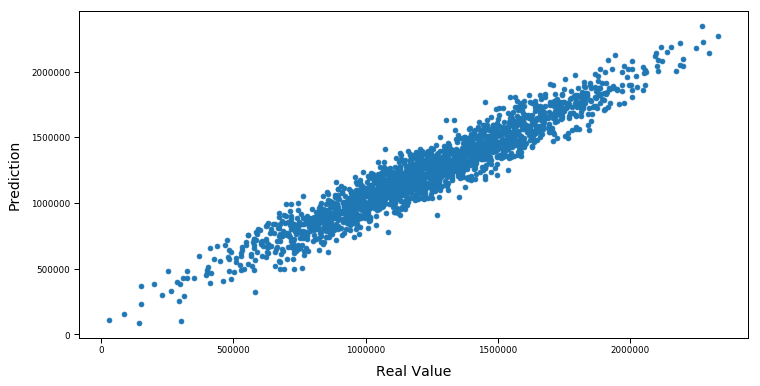

In [97]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predict)
plt.xlabel('Real Value', fontsize=14, labelpad=10)
plt.ylabel('Prediction', fontsize=14, labelpad=10)

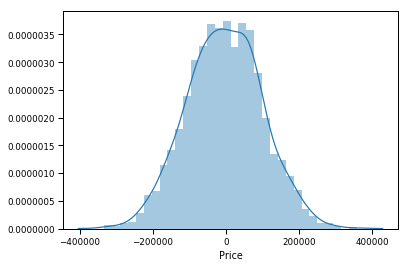

In [98]:
sns.distplot((y_test - predict))

In [0]:
from sklearn import metrics

In [105]:
print(f'MAE ${metrics.mean_absolute_error(y_test, predict):.2f}')

MAE $82288.22


In [109]:
print(f'MSE ${metrics.mean_squared_error(y_test, predict):.2f}')

MSE $10460958907.21


In [111]:
print(f'RMSE ${np.sqrt(metrics.mean_squared_error(y_test, predict)):.2f}')

RMSE $102278.83
